In [2]:
# imported necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from datetime import datetime

In [3]:
stock = 'AAPL'

In [4]:
aapl = yf.Ticker(stock)

In [5]:
# displayed attributes and methods of Ticker object
print(dir(aapl))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_analysis', '_data', '_download_options', '_earnings', '_earnings_dates', '_expirations', '_fast_info', '_fetch_ticker_tz', '_financials', '_fundamentals', '_get_ticker_tz', '_holders', '_isin', '_lazy_load_price_history', '_news', '_options2df', '_price_history', '_quote', '_shares', '_tz', '_underlying', 'actions', 'analyst_price_target', 'balance_sheet', 'balancesheet', 'basic_info', 'calendar', 'capital_gains', 'cash_flow', 'cashflow', 'dividends', 'earnings', 'earnings_dates', 'earnings_forecasts', 'earnings_trend', 'fast_info', 'financials', 'get_actions', 'get_analyst_price_target', 'get_balance_sheet', 'get_balancesheet', 

In [6]:
aapl.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [7]:
# Returns Apple's year high from basic info
aapl.basic_info['yearHigh']

199.6199951171875

In [8]:
# Returns Apple's 50-day average from basic info
aapl.basic_info['fifty_day_average']

185.01419921875

In [9]:
# get_financials() method fetch's Apple's financial statements
aapl.get_financials()

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.147,0.162,0.133,0.144
NormalizedEBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,96995000000.0,99803000000.0,94680000000.0,57411000000.0
ReconciledDepreciation,11519000000.0,11104000000.0,11284000000.0,11056000000.0
ReconciledCostOfRevenue,214137000000.0,223546000000.0,212981000000.0,169559000000.0
EBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
EBIT,117669000000.0,122034000000.0,111852000000.0,69964000000.0
NetInterestIncome,-183000000.0,-106000000.0,198000000.0,890000000.0
InterestExpense,3933000000.0,2931000000.0,2645000000.0,2873000000.0


In [13]:
financials.loc['EBITDA'].values

array([129188000000.0, 133138000000.0, 123136000000.0, 81020000000.0],
      dtype=object)

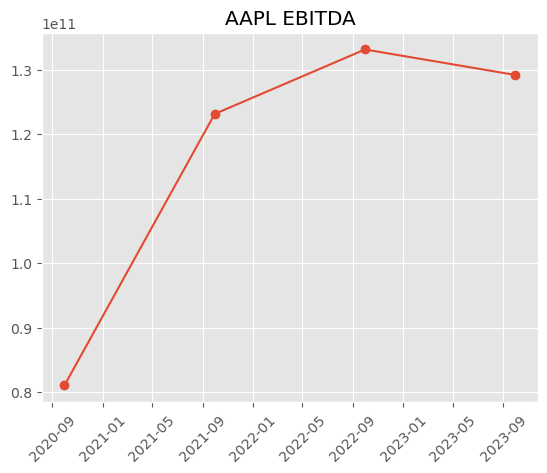

In [14]:
# created a line plot of EBITDA for AAPL
plt.style.use('ggplot')
financials = aapl.get_financials()
plt.plot(financials.loc['EBITDA'].index, financials.loc['EBITDA'].values, marker='o')
plt.xticks(rotation=45)
plt.title(f'{stock} EBITDA');

In [15]:
financials = aapl.get_financials()
revenue = financials.loc['CostOfRevenue':'TotalRevenue']

In [16]:
revenue = revenue/1000000000

In [17]:
revenue = revenue.T

In [18]:
type(revenue)

pandas.core.frame.DataFrame

In [19]:
# calculated costOfRevenue and TotalRevenue from AAPL
revenue

,CostOfRevenue,TotalRevenue
2023-09-30,214.137,383.285
2022-09-30,223.546,394.328
2021-09-30,212.981,365.817
2020-09-30,169.559,274.515


(0.0, 500.0)

<Figure size 2000x1000 with 0 Axes>

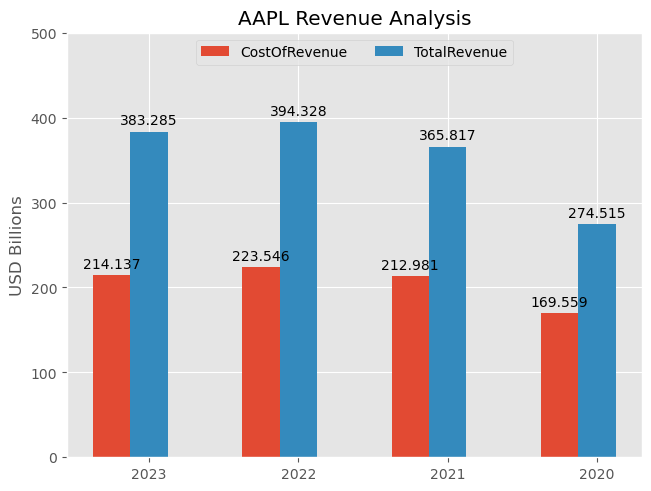

In [20]:
# created a bar chart to visualize revenue data for AAPL
plt.figure(figsize=(20,10))
x_values = [i.year for i in revenue.index]
data = revenue

x= np.arange(len(x_values))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('USD Billions')
ax.set_title(f'{stock} Revenue Analysis')
ax.set_xticks(x + width, x_values)
ax.legend(revenue.columns, loc=9, ncols=3)
ax.set_ylim(0,500)

In [21]:
aapl_info = aapl.get_info()

In [22]:
aapl_info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpri

In [23]:
# return short ratio for AAPL
aapl_info['shortRatio']

1.71

In [24]:
# return earnings growth for AAPL
aapl_info['earningsGrowth']

0.16

In [25]:
# returns AAPL's business summary description
aapl_info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple P

In [26]:
calls = aapl.option_chain()[0]

In [27]:
puts = aapl.option_chain()[1]

In [28]:
# outputs the last stock price for AAPL
aapl_price = aapl.basic_info['lastPrice']
aapl_price

172.75

In [29]:
# returns the last 5 rows with strike prices higher than last price of AAPL
g = calls[calls['strike'] > aapl_price].iloc[-5:]
g

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
68,AAPL240315C00280000,2024-01-22 15:25:10+00:00,280.0,0.01,0.0,0.01,0.0,0.0,7.0,1029,1.437503,False,REGULAR,USD
69,AAPL240315C00285000,2024-03-11 18:14:39+00:00,285.0,0.01,0.0,0.03,0.0,0.0,6.0,2020,1.593752,False,REGULAR,USD
70,AAPL240315C00290000,2024-02-14 15:07:46+00:00,290.0,0.01,0.0,0.01,0.0,0.0,1.0,804,1.500002,False,REGULAR,USD
71,AAPL240315C00300000,2024-01-08 14:30:03+00:00,300.0,0.01,0.0,0.00,0.0,0.0,5.0,3181,0.500005,False,REGULAR,USD
72,AAPL240315C00310000,2024-03-11 13:36:44+00:00,310.0,0.01,0.0,0.01,0.0,0.0,285.0,3810,1.687502,False,REGULAR,USD


In [30]:
# returns the last 5 rows with strike prices higher than last price of AAPL
l = calls[calls['strike'] < aapl_price].iloc[-5:]
l

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
34,AAPL240315C00162500,2024-03-11 18:20:56+00:00,162.5,10.24,10.35,10.70,0.37,3.748732,172.0,412,0.478521,True,REGULAR,USD
35,AAPL240315C00165000,2024-03-11 19:59:17+00:00,165.0,8.10,8.00,8.25,1.60,24.615390,4068.0,5029,0.402838,True,REGULAR,USD
36,AAPL240315C00167500,2024-03-11 19:58:09+00:00,167.5,5.78,5.75,5.85,1.33,29.887650,878.0,3971,0.330573,True,REGULAR,USD
37,AAPL240315C00170000,2024-03-11 19:59:55+00:00,170.0,3.72,3.70,3.80,0.97,35.272728,10830.0,22392,0.300544,True,REGULAR,USD
38,AAPL240315C00172500,2024-03-11 19:59:59+00:00,172.5,2.10,2.06,2.14,0.61,40.939590,44317.0,23026,0.279060,True,REGULAR,USD


In [31]:
# concatenates l and g rows in a single Dataframe and reverses the rows
aapl_options = pd.concat([l,g])[::-1]

In [32]:
aapl_options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
72,AAPL240315C00310000,2024-03-11 13:36:44+00:00,310.0,0.01,0.00,0.01,0.00,0.000000,285.0,3810,1.687502,False,REGULAR,USD
71,AAPL240315C00300000,2024-01-08 14:30:03+00:00,300.0,0.01,0.00,0.00,0.00,0.000000,5.0,3181,0.500005,False,REGULAR,USD
70,AAPL240315C00290000,2024-02-14 15:07:46+00:00,290.0,0.01,0.00,0.01,0.00,0.000000,1.0,804,1.500002,False,REGULAR,USD
69,AAPL240315C00285000,2024-03-11 18:14:39+00:00,285.0,0.01,0.00,0.03,0.00,0.000000,6.0,2020,1.593752,False,REGULAR,USD
68,AAPL240315C00280000,2024-01-22 15:25:10+00:00,280.0,0.01,0.00,0.01,0.00,0.000000,7.0,1029,1.437503,False,REGULAR,USD
38,AAPL240315C00172500,2024-03-11 19:59:59+00:00,172.5,2.10,2.06,2.14,0.61,40.939590,44317.0,23026,0.279060,True,REGULAR,USD
37,AAPL240315C00170000,2024-03-11 19:59:55+00:00,170.0,3.72,3.70,3.80,0.97,35.272728,10830.0,22392,0.300544,True,REGULAR,USD
36,AAPL240315C00167500,2024-03-11 19:58:09+00:00,167.5,5.78,5.75,5.85,1.33,29.887650,878.0,3971,0.330573,True,REGULAR,USD
35,AAPL240315C00165000,2024-03-11 19:59:17+00:00,165.0,8.10,8.00,8.25,1.60,24.615390,4068.0,5029,0.402838,True,REGULAR,USD
34,AAPL240315C00162500,2024-03-11 18:20:56+00:00,162.5,10.24,10.35,10.70,0.37,3.748732,172.0,412,0.478521,True,REGULAR,USD


In [33]:
# return 3 rows with highest open interest in descending order 
aapl_options.nlargest(3, 'openInterest')

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
38,AAPL240315C00172500,2024-03-11 19:59:59+00:00,172.5,2.10,2.06,2.14,0.61,40.939590,44317.0,23026,0.279060,True,REGULAR,USD
37,AAPL240315C00170000,2024-03-11 19:59:55+00:00,170.0,3.72,3.70,3.80,0.97,35.272728,10830.0,22392,0.300544,True,REGULAR,USD
35,AAPL240315C00165000,2024-03-11 19:59:17+00:00,165.0,8.10,8.00,8.25,1.60,24.615390,4068.0,5029,0.402838,True,REGULAR,USD


## Get info for stocks

In [34]:
df = pd.read_csv('https://bit.ly/roboticview-xlk', skiprows=1)

In [35]:
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,AAPL,Apple Inc.,23.64%,178.85,-1.86,-1.03%,51.46 M,124.17 - 198.23
1,MSFT,Microsoft Corp,23.09%,327.73,-3.43,-1.04%,21.09 M,213.43 - 366.78
2,NVDA,Nvidia Corp,4.60%,454.61,-14.84,-3.16%,47.54 M,112.04 - 502.66
3,AVGO,Broadcom Inc,4.45%,883.18,-22.42,-2.48%,2.83 M,426.41 - 925.91
4,ADBE,Adobe Inc.,3.05%,548.76,-10.87,-1.94%,2.83 M,278.23 - 574.40


In [36]:
stocks = df['Symbol'].to_list()

In [37]:
portfolio = []
for co in stocks:
    try:
        pe = yf.Ticker(co).get_info()['trailingPE']
        portfolio.append((co, pe))
    except:
        pass

In [38]:
portfolio

[('AAPL', 26.824533),
 ('MSFT', 36.608143),
 ('NVDA', 72.078995),
 ('AVGO', 39.209217),
 ('ADBE', 47.493217),
 ('CSCO', 15.264439),
 ('CRM', 72.68408),
 ('ACN', 34.62152),
 ('ORCL', 31.527624),
 ('AMD', 367.3889),
 ('INTC', 112.15),
 ('INTU', 66.551125),
 ('TXN', 24.672806),
 ('IBM', 23.525154),
 ('QCOM', 24.410841),
 ('AMAT', 23.690588),
 ('NOW', 89.98097),
 ('LRCX', 35.95367),
 ('ADI', 35.394646),
 ('PANW', 43.791344),
 ('SNPS', 62.259914),
 ('CDNS', 79.827675),
 ('KLAC', 34.75558),
 ('ROP', 43.544025),
 ('NXPI', 23.671963),
 ('APH', 35.33119),
 ('MSI', 34.041286),
 ('ANET', 41.18845),
 ('ADSK', 61.784695),
 ('MCHP', 21.161213),
 ('ON', 16.687117),
 ('TEL', 13.393163),
 ('FTNT', 48.9452),
 ('CTSH', 18.280285),
 ('IT', 41.96751),
 ('CDW', 30.572134),
 ('ANSS', 58.21466),
 ('KEYS', 28.018417),
 ('HPQ', 9.049853),
 ('MPWR', 81.91003),
 ('FICO', 71.458496),
 ('GLW', 48.382355),
 ('HPE', 12.44138),
 ('TDY', 22.97999),
 ('VRSN', 24.378004),
 ('PTC', 94.116165),
 ('ENPH', 41.918568),
 ('AKA

In [39]:
df = pd.DataFrame(portfolio, columns=['Stock','PE'])

In [40]:
df.head()

,Stock,PE
0,AAPL,26.824533
1,MSFT,36.608143
2,NVDA,72.078995
3,AVGO,39.209217
4,ADBE,47.493217


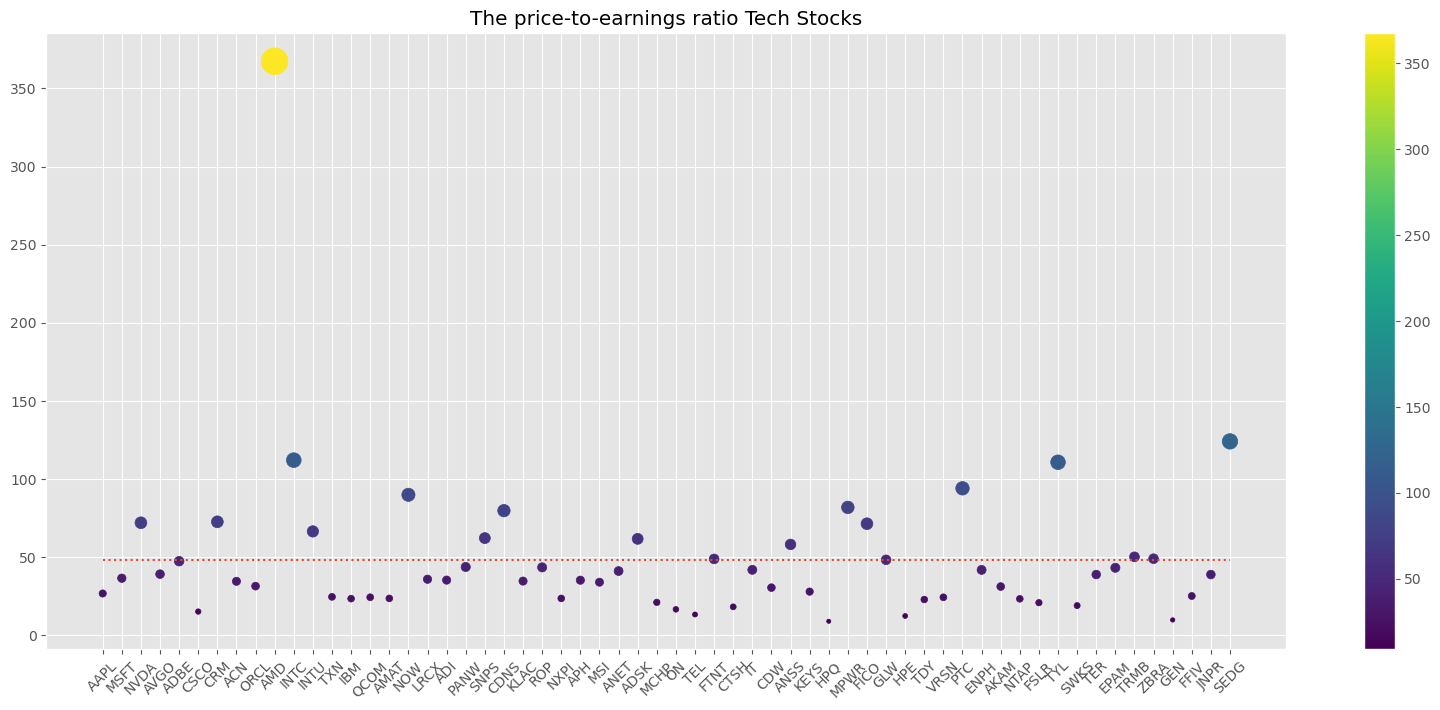

In [41]:
plt.figure(figsize=(20,8))
plt.scatter(df['Stock'], df['PE'], s=df['PE'], c=df['PE'])
plt.hlines(df['PE'].mean(), df.index[0], df.index[-1], linestyle=":")
plt.xticks(rotation=45)
plt.colorbar()
plt.title('The price-to-earnings ratio Tech Stocks');

In [42]:
aapl_valuation = si.get_stats_valuation('AAPL')

In [43]:
aapl_valuation.rename(columns={'Unnamed: 0':'Ratios'}, inplace=True)
aapl_valuation

,Ratios,As of Date: 3/11/2024Current,12/31/2023,9/30/2023,6/30/2023,3/31/2023,12/31/2022
0,Market Cap (intraday),2.64T,2.99T,2.68T,3.05T,2.61T,2.07T
1,Enterprise Value,2.67T,3.04T,2.72T,3.10T,2.67T,2.14T
2,Trailing P/E,26.55,31.41,28.73,32.88,28.00,21.27
3,Forward P/E,26.18,29.15,25.77,29.41,27.86,21.28
4,PEG Ratio (5 yr expected),2.10,2.31,2.18,2.66,2.79,2.53
5,Price/Sales (ttm),6.96,7.94,7.10,8.08,6.89,5.38
6,Price/Book (mrq),35.58,47.90,44.17,49.08,45.99,40.62
7,Enterprise Value/Revenue,6.93,25.46,30.43,37.96,28.14,18.26
8,Enterprise Value/EBITDA,20.01,70.43,88.85,115.92,82.86,54.93


In [44]:
dow_list = si.tickers_dow()

In [45]:
dow_list

['AAPL',
 'AMGN',
 'AMZN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WMT']

In [46]:
stats_df = pd.DataFrame()
stats_df['Ratios'] = aapl_valuation['Ratios']
for co in dow_list:
    stats = si.get_stats_valuation(co)
    column = stats[stats.columns[1]]
    stats_df[co] = column

In [47]:
stats_df.index = stats_df['Ratios']

In [48]:
stats_df

,Ratios,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Ratios,,,,,,,,,,,,,,,,,,,,,
Market Cap (intraday),Market Cap (intraday),2.64T,146.71B,1.82T,161.69B,121.11B,169.38B,296.12B,200.43B,278.37B,...,51.90B,312.78B,3.02T,150.24B,377.31B,50.05B,439.37B,575.22B,166.11B,484.13B
Enterprise Value,Enterprise Value,2.67T,200.38B,1.87T,NaN,157.74B,200.28B,294.52B,186.37B,290.98B,...,62.77B,340.74B,3.03T,152.49B,403.94B,57.43B,472.28B,577.33B,338.99B,535.59B
Trailing P/E,Trailing P/E,26.55,21.92,60.47,19.93,NaN,16.86,72.69,15.05,13.19,...,16.99,882.14,36.72,28.91,26.86,17.08,19.97,32.26,14.37,31.42
Forward P/E,Forward P/E,26.18,14.10,41.49,17.36,59.17,15.97,31.45,13.35,11.61,...,9.86,14.43,30.49,24.27,22.99,11.93,17.12,28.17,8.59,25.58
PEG Ratio (5 yr expected),PEG Ratio (5 yr expected),2.10,2.44,2.37,1.54,6.53,1.95,1.64,3.58,NaN,...,2.15,0.10,2.06,1.62,3.39,0.67,1.34,1.73,1.09,2.48
Price/Sales (ttm),Price/Sales (ttm),6.96,5.22,3.20,2.72,1.55,2.60,8.62,3.53,1.43,...,1.59,5.23,13.32,2.98,4.73,1.23,1.20,17.39,1.24,0.75
Price/Book (mrq),Price/Book (mrq),35.58,23.54,9.02,5.76,NaN,8.69,4.96,4.33,1.73,...,10.80,8.32,12.67,10.62,7.91,2.01,4.95,14.28,1.80,5.77
Enterprise Value/Revenue,Enterprise Value/Revenue,6.93,7.11,3.25,NaN,2.03,2.99,8.45,3.26,1.48,...,1.92,5.67,13.29,2.96,4.81,1.39,1.27,17.31,2.53,0.83
Enterprise Value/EBITDA,Enterprise Value/EBITDA,20.01,13.54,20.92,NaN,68.14,12.75,29.58,10.25,6.09,...,-9.29,49.33,25.02,22.39,17.89,NaN,13.00,24.30,8.45,14.72


In [49]:
stats_df = stats_df.T

In [50]:
stats_df.drop('Ratios', inplace=True)

In [51]:
stats_df

Ratios,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA
AAPL,2.64T,2.67T,26.55,26.18,2.10,6.96,35.58,6.93,20.01
AMGN,146.71B,200.38B,21.92,14.10,2.44,5.22,23.54,7.11,13.54
AMZN,1.82T,1.87T,60.47,41.49,2.37,3.20,9.02,3.25,20.92
AXP,161.69B,NaN,19.93,17.36,1.54,2.72,5.76,NaN,NaN
BA,121.11B,157.74B,NaN,59.17,6.53,1.55,NaN,2.03,68.14
CAT,169.38B,200.28B,16.86,15.97,1.95,2.60,8.69,2.99,12.75
CRM,296.12B,294.52B,72.69,31.45,1.64,8.62,4.96,8.45,29.58
CSCO,200.43B,186.37B,15.05,13.35,3.58,3.53,4.33,3.26,10.25
CVX,278.37B,290.98B,13.19,11.61,NaN,1.43,1.73,1.48,6.09
DIS,202.36B,242.86B,67.68,23.70,0.54,2.27,2.01,2.73,18.39


In [52]:
stats_df['Market Cap (intraday)'].dtype

dtype('O')

In [56]:
stats_df['Market Cap'] = stats_df['Market Cap (intraday)'].apply(lambda x : float(x.strip('T'))*1000 if 'T' in x else float(x.strip('B')))                                                            

In [59]:
stats_df

Ratios,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Market Cap
AAPL,2.64T,2.67T,26.55,26.18,2.10,6.96,35.58,6.93,20.01,2640.00
AMGN,146.71B,200.38B,21.92,14.10,2.44,5.22,23.54,7.11,13.54,146.71
AMZN,1.82T,1.87T,60.47,41.49,2.37,3.20,9.02,3.25,20.92,1820.00
AXP,161.69B,NaN,19.93,17.36,1.54,2.72,5.76,NaN,NaN,161.69
BA,121.11B,157.74B,NaN,59.17,6.53,1.55,NaN,2.03,68.14,121.11
CAT,169.38B,200.28B,16.86,15.97,1.95,2.60,8.69,2.99,12.75,169.38
CRM,296.12B,294.52B,72.69,31.45,1.64,8.62,4.96,8.45,29.58,296.12
CSCO,200.43B,186.37B,15.05,13.35,3.58,3.53,4.33,3.26,10.25,200.43
CVX,278.37B,290.98B,13.19,11.61,NaN,1.43,1.73,1.48,6.09,278.37
DIS,202.36B,242.86B,67.68,23.70,0.54,2.27,2.01,2.73,18.39,202.36


Text(0.5, 1.0, 'Market Cap')

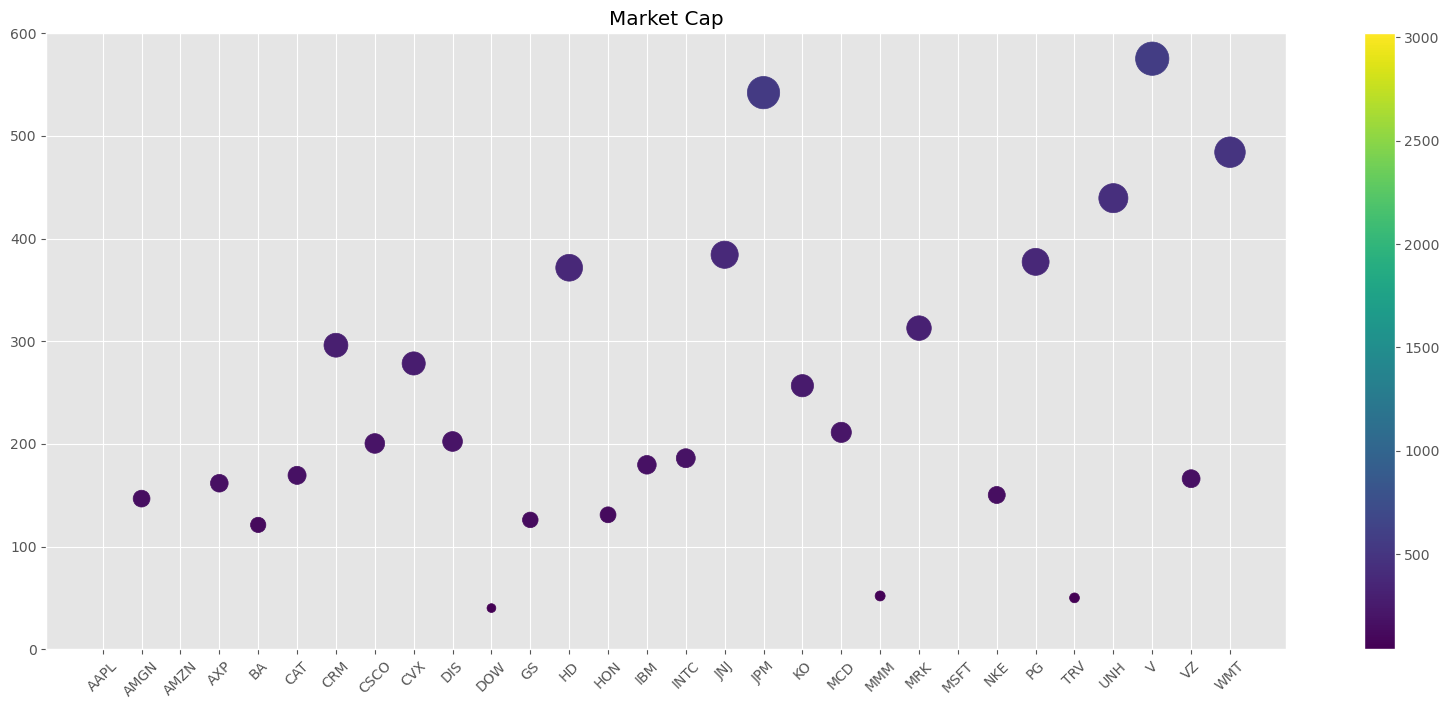

In [60]:
plt.figure(figsize=(20,8))
plt.scatter(stats_df.index, stats_df['Market Cap'], s=stats_df['Market Cap'], c=stats_df['Market Cap'])
plt.xticks(rotation=45)
plt.colorbar()
plt.ylim(0,600)
plt.title('Market Cap')

## Returns and Historic Prices

In [61]:
mystocks = ['AAPL','MSFT','IBM']

In [62]:
today = datetime.today()
today

datetime.datetime(2024, 3, 11, 20, 24, 39, 525135)

In [63]:
p_df = yf.download(mystocks, start='2020-01-01', end=today)

[*********************100%%**********************]  3 of 3 completed


In [64]:
p_df.head()

Price       Adj Close                              Close              \
Ticker           AAPL         IBM        MSFT       AAPL         IBM   
Date                                                                   
2020-01-02  73.059425  105.346336  154.493851  75.087502  129.464630   
2020-01-03  72.349121  104.506172  152.570099  74.357498  128.432129   
2020-01-06  72.925636  104.319489  152.964462  74.949997  128.202682   
2020-01-07  72.582649  104.389465  151.569733  74.597504  128.288712   
2020-01-08  73.750252  105.260765  153.984055  75.797501  129.359467   

Price                        High                                Low  \
Ticker            MSFT       AAPL         IBM        MSFT       AAPL   
Date                                                                   
2020-01-02  160.619995  75.150002  129.942642  160.729996  73.797501   
2020-01-03  158.619995  75.144997  128.929260  159.949997  74.125000   
2020-01-06  159.029999  74.989998  128.336517  159.100006  73.187500   
2020-01-07  157.580002  75.224998  129.024857  159.669998  74.370003   
2020-01-08  160.089996  76.110001  129.885284  160.800003  74.290001   

Price                                    Open                          \
Ticker             IBM        MSFT       AAPL         IBM        MSFT   
Date                                                                    
2020-01-02  128.843216  158.330002  74.059998  129.063095  158.779999   
2020-01-03  127.686424  158.059998  74.287498  127.695984  158.320007   
2020-01-06  127.342255  156.509995  73.447502  127.552582  157.080002   
2020-01-07  127.533463  157.320007  74.959999  127.810707  159.320007   
2020-01-08  128.030594  157.949997  74.290001  128.594650  158.929993   

Price          Volume                     
Ticker           AAPL      IBM      MSFT  
Date                                      
2020-01-02  135480400  3293436  22622100  
2020-01-03  146322800  2482890  21116200  
2020-01-06  118387200  2537073  20813700  
2020-01-07  108872000  3232977  21634100  
2020-01-08  132079200  4545916  27746500

In [65]:
p_df = p_df['Adj Close'].copy()
p_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1054 entries, 2020-01-02 to 2024-03-11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1054 non-null   float64
 1   IBM     1054 non-null   float64
 2   MSFT    1054 non-null   float64
dtypes: float64(3)
memory usage: 32.9 KB


In [66]:
p_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01',
               '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-11'],
              dtype='datetime64[ns]', name='Date', length=1054, freq=None)

In [67]:
norm_df = p_df/p_df.iloc[0]*100

<Axes: xlabel='Date'>

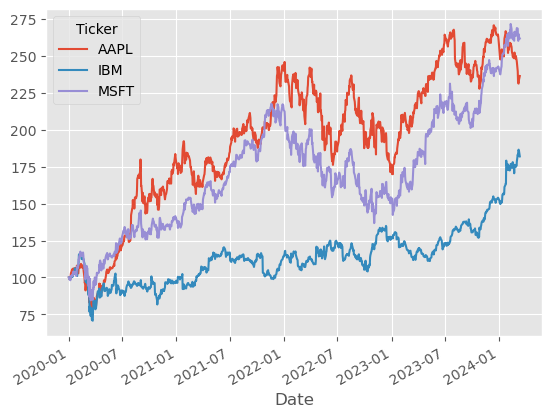

In [68]:
norm_df.plot()

In [69]:
stock_df = p_df[['AAPL']].copy()
stock_df.head()

Ticker,AAPL
Date,
2020-01-02,73.059425
2020-01-03,72.349121
2020-01-06,72.925636
2020-01-07,72.582649
2020-01-08,73.750252


In [70]:
stock_df['MA'] = stock_df.rolling(10).mean()

In [71]:
stock_df.head()

Ticker,AAPL,MA
Date,,
2020-01-02,73.059425,NaN
2020-01-03,72.349121,NaN
2020-01-06,72.925636,NaN
2020-01-07,72.582649,NaN
2020-01-08,73.750252,NaN


In [72]:
stock_df.dropna(inplace=True)

In [75]:
max_price = stock_df[stock_df['AAPL'] == stock_df['AAPL'].max()]['AAPL']
max_price

Date
2023-12-14    197.857529
Name: AAPL, dtype: float64

In [76]:
min_price = stock_df[stock_df['AAPL'] == stock_df['AAPL'].min()]['AAPL']
min_price

Date
2020-03-23    54.707005
Name: AAPL, dtype: float64

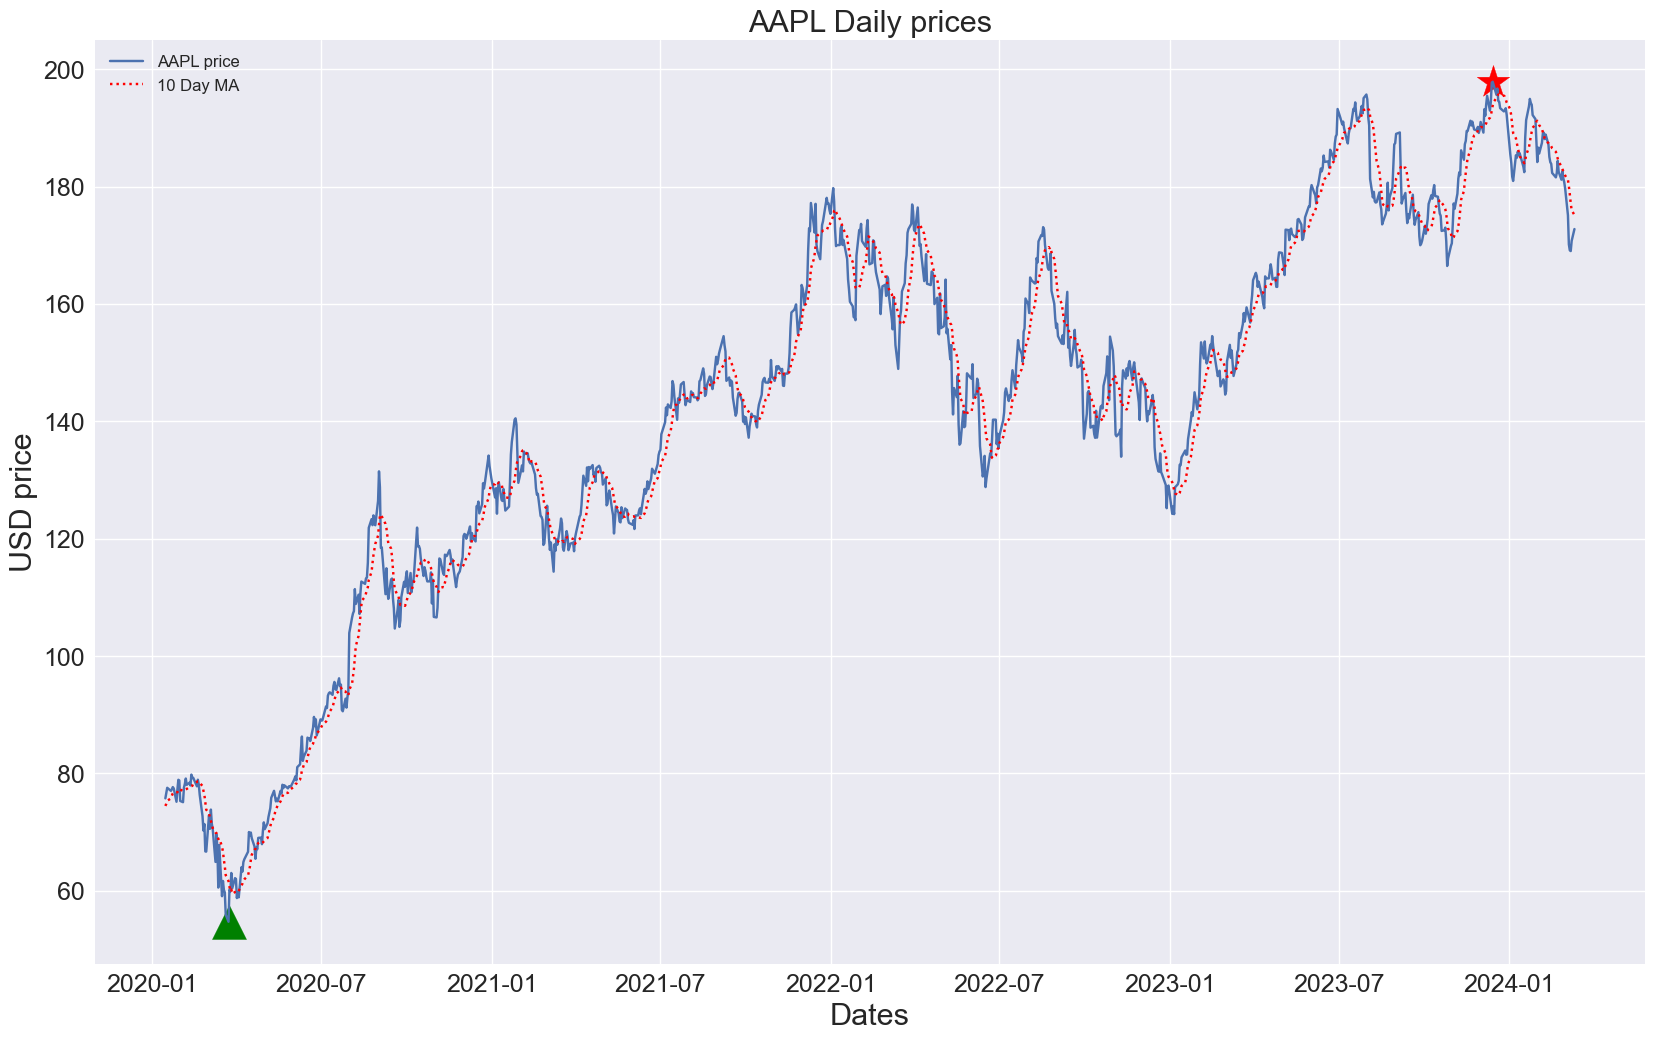

In [79]:
x = stock_df.index
y = stock_df['AAPL']
stock = stock_df.columns[0]

plt.figure(figsize=(20,12))
plt.style.use('seaborn-v0_8')
plt.plot(x,y, label=f'{stock} price')
plt.plot(x, stock_df['MA'], color='red', linestyle=':', label='10 Day MA')
plt.scatter(max_price.index, max_price.values, s=600,c='red', marker='*')
plt.scatter(min_price.index, min_price.values, s=600,c='green', marker='^')
plt.legend(fontsize=12)

plt.title(f'{stock} Daily prices',fontsize=22)
plt.ylabel('USD price', fontsize=22)
plt.xlabel('Dates', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);